##Pendulo doble (sistema caótico)

Péndulo doble
Un péndulo doble consta de 2 péndulos, uno de los cuales cuelga del segundo. A continuación, los ángulos $\theta_{1}$ y $\theta_{2}$. dan la posición de la bola principal con masa m1 y la bola colgante de masa m2 respectivamente. Las longitudes de la varilla (sin masa) que sujeta las bolas al pivote son L1 y L2 respectivamente.


<img src="https://blogger.googleusercontent.com/img/a/AVvXsEiajYvFX0kvEnN5wiRO-tXRuJWNKMF1pwNA7fLJLgordqoYUj-sUXpDlqeFDWRm4-tvjHFiVCWQawg7BI4oKt3IMs0diB3S1zIP0udnesQa1roMhDT8BlR_CQ7d5bfe6eQXfPthXHrhZYoszgtEX8eFz4UyXvSez-0wOBWh-ErrzR40B2hKmddVdCXtCME" width="25%">


Vector posición de las masas
$$
\overrightarrow{r_{1}} = L_{1}\left(\sin{\theta_{1}}, \cos{\theta_{1}}\right)
$$

$$
\overrightarrow{r_{2}} = L_{1}\left(\sin{\theta_{1}},\cos{\theta_{1}}\right) + L_{2}\left(\sin{\theta_{2}},\cos{\theta_{2}}\right)
$$

Vector velocidad (deivada del v. posición)
$$
\dot{r_{1}} = v_{1} = L_{1}\dot{\theta}\left( \cos{\theta_{1}} - \sin{\theta_{1}} \right)
$$

$$
\dot{r_{2}} = v_{2} = v_{1} + L_{2}\dot{\theta}\left( \cos{\theta_{2}} - \sin{\theta_{2}} \right)
$$

Energia cinetica del sistema
$$
E_{K} = \frac{1}{2}m_{1}v_{1}^2 + \frac{1}{2}m_{2}v_{2}^2
$$
al reemplazar $v_{1}$ y $v_{2}$ en el sistema tenemos:
$$
= \frac{1}{2}(m_{1}+m_{2})L_{1}^2\dot{\theta_{1}}^2 + \frac{1}{2}m_{2}L_{2}^2\dot{\theta_{2}}^2 + m_{2}L_{1}L_{2}\dot{\theta_{1}}\dot{\theta_{2}}\cos{(\theta_{2}-\theta_{1})}
$$

La energia potencias es la usual
$$
E_{p} = -m_{1} g y_{1} - m_{2}gy_{2}
$$
reemplazado nuevamente tenemos
$$
E_{p} = -(m_{1}+ m_{2})gL_{1}\cos{\theta_{1}}-m_{2}gL_{2}\cos{\theta_{2}}
$$

El lagrangiano para este sistema sería:
$$
L = \frac{1}{2}(m_{1}+m_{2})L_{1}^2\dot{\theta_{1}}^2 + \frac{1}{2}m_{2}L_{2}^2\dot{\theta_{2}}^2 + m_{2}L_{1}L_{2}\dot{\theta_{1}}\dot{\theta_{2}}\cos{(\theta_{2}-\theta_{1})} + (m_{1}+ m_{2})gL_{1}\cos{\theta_{1}}+m_{2}gL_{2}\cos{\theta_{2}}
$$

Resolviendo este par de ecuaciones tenemos nuestras ecuaciones de movimiento
$$
\frac{d}{dt}\frac{\partial L}{\partial\dot{\theta_{1}}} - \frac{\partial L}{\partial\theta_{1}} = 0
$$

$$
\frac{d}{dt}\frac{\partial L}{\partial\dot{\theta_{2}}} - \frac{\partial L}{\partial\theta_{2}} = 0
$$

Despues de mucho algebra (Omitida por razones de que son procesos algebraicos muy largos) Obtenemos nuestras ecuaciones de movimiento. Dadas por:
$$
\ddot{\theta_{1}} = \frac{ m_{2}g\sin{\theta_{2}}\cos{(\theta_{2}-\theta_{1})} - m_{2}\sin{(\theta_{2}-\theta_{1})}( L_{1}\cos{(\theta_{2}-\theta_{1})}\dot{\theta_{1}}^2 + L_{2}\dot{\theta_{2}}^2 ) - (m_{1}+m_{2})g\sin{\theta_{1}}}{L_{1}\left(m_{1}+ m_{2}\sin^2{(\theta_{2}-\theta_{1})}\right)}
$$

$$
\ddot{\theta_{2}} = \frac{ ( m_{1}+m_{2} )( L_{1}\dot{\theta_{1}}^2\sin{(\theta_{2}-\theta_{1})}) - g\sin{\theta_{2}} + g\sin{\theta_{1}}\cos{(\theta_{2}-\theta_{1})}) + m_{2}L_{2}\dot{\theta_{2}}^2\sin{(\theta_{2}-\theta_{1})}\cos{(\theta_{2}-\theta_{1})} }{L_{2}\left(m_{1}+ m_{2}\sin^2{(\theta_{2}-\theta_{1})}\right)}
$$

In [1]:
#librerias
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Runge-kutta 4
def R_K4(fn, x0, t, params):
  S = np.zeros((len(t),len(x0)))  #solución
  S[1,:] = x0
  delt = t[2] - t[1]

  #metodo
  for i in range(1,len(t)-1):
    k1 = fn(S[i,:],t[i], params)
    k2 = fn(S[i,:] + 0.5 * delt * k1 , t[i] + 0.5 * delt, params)
    k3 = fn(S[i,:] + 0.5* delt *k2 , t[i] + 0.5* delt,params)
    k4 = fn(S[i,:] + delt *k3, t[i] + delt, params)

    S[i+1,:] = S[i,:] + (delt/6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)

  return S

In [3]:
#función ecuaciones de movimiento
def fn_pd(tetha0, t, params):
  #parametros de los pendulos
  m1 = params[0]
  m2 = params[1]
  l1 = params[2]
  l2 = params[3]
  g = 9.8

  dif_tetha = tetha0[1] - tetha0[0]

  #ecuaciones
  d_tetha1 = tetha0[2]
  d2_tetha1 = (m2 * g * np.sin(tetha0[1]) * np.cos(dif_tetha)\
               - m2 * np.sin(dif_tetha) * (l1 * np.cos(dif_tetha)\
                                           * tetha0[2]**2 + l2 *tetha0[3]**2)\
               - (m1+m2)*g*np.sin(tetha0[0]) ) /( l1 *(m1+m2*np.sin(dif_tetha)**2) )
  d_tetha2 = tetha0[3]   # dθ₂
  d2_tetha2 = ((m1+m2)*(l1*tetha0[2]**2 * np.sin(dif_tetha)\
                        - g * np.sin(tetha0[1])\
                        + g*np.sin(tetha0[0])*np.cos(dif_tetha))\
               + m2*l2*tetha0[3]**2*np.sin(dif_tetha)*np.cos(dif_tetha)) / (l2 * (m1 + m2*np.sin(dif_tetha)**2))

  return np.array([d_tetha1, d2_tetha1, d_tetha2, d2_tetha2])

In [4]:
tetha0 = [np.pi/2,np.pi/4,0,0] #Punto inicial, i.e condiciones iniciales
t = np.arange(0,50,0.05)

params = (1. ,1. ,1. ,1.)
sol = R_K4(fn_pd,tetha0,t,params); #Solucion a nuestro problema

In [5]:
sol

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.57079633e+00,  7.85398163e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 1.57079633e+00,  2.95398163e-01, -3.59611009e-19,
        -1.65240808e-17],
       ...,
       [ 1.57079633e+00, -4.87254602e+02, -3.62226174e-13,
         4.06742116e-13],
       [ 1.57079633e+00, -4.87744602e+02, -3.26083162e-13,
         1.02823753e-12],
       [ 1.57079633e+00, -4.88234602e+02, -2.61726028e-13,
         1.50328541e-12]])

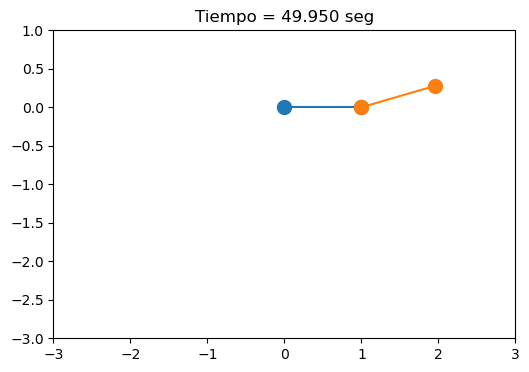

In [6]:
from matplotlib.animation import FuncAnimation

# (Código previo...)

# Animación
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 1)
ax.set_aspect('equal', 'box')
line1, = ax.plot([], [], marker='o', markersize=10)
line2, = ax.plot([], [], marker='o', markersize=10)

def update(i):
    x1 = np.sin(sol[i, 0])
    y1 = -np.cos(sol[i, 0])
    x2 = x1 + np.sin(sol[i, 1])
    y2 = y1 - np.cos(sol[i, 1])

    line1.set_data([0, x1], [0, y1])
    line2.set_data([x1, x2], [y1, y2])

    ax.set_title(f'Tiempo = {t[i]:.3f} seg')

    return line1, line2

ani = FuncAnimation(fig, update, frames=len(t), blit=True)

# Guardar la animación como un archivo MP4
mp4_file_path = "double_pendulum_animation.mp4"
ani.save(mp4_file_path, writer="ffmpeg", fps=30)

# Muestra el archivo MP4 en el cuaderno de Colab
from IPython.display import Video
Video(mp4_file_path, embed=True)


Comentarios y conclusiones. Las animaciones fuero hechas con con la ayuda de chat gpt. El pendulo doble solo hace ese movimiento debido a que mi tetha1 no cambia al aplicar el metodo de runge kutta. Estuve dandole muchas vueltas pero al final no llegué al resultado esperado. Estoy seguro de que si se logra hacer variar ese angulo con la iteraciones tendriamos un movimiento pendular caotico.